In [2]:
#Doing EDA on  dataset
import pandas as pd

df = pd.read_csv("ab_test_dataset_50000.csv", parse_dates=["timestamp"])

# shape & types
print("Rows:", len(df))
print(df.dtypes)

# missing values
print("\nMissing values:\n", df.isnull().sum())

# quick distributions
print("\nVariant counts:\n", df['variant'].value_counts())
print("\nDevice counts:\n", df['device'].value_counts())
print("\nCountry counts:\n", df['country'].value_counts())
print("\nTraffic source counts:\n", df['traffic_source'].value_counts())

df.head()


Rows: 50000
user_id                         object
timestamp               datetime64[ns]
experiment_name                 object
variant                         object
device                          object
os                              object
browser                         object
country                         object
traffic_source                  object
returning_user                   int64
viewed_page                      int64
clicked_cta                      int64
added_to_cart                    int64
purchased                        int64
order_value                    float64
session_duration_sec             int64
pages_viewed                     int64
scroll_depth_pct                 int64
dtype: object

Missing values:
 user_id                 0
timestamp               0
experiment_name         0
variant                 0
device                  0
os                      0
browser                 0
country                 0
traffic_source          0
returning_user      

,user_id,timestamp,experiment_name,variant,device,os,browser,country,traffic_source,returning_user,viewed_page,clicked_cta,added_to_cart,purchased,order_value,session_duration_sec,pages_viewed,scroll_depth_pct
0,U126247,2025-10-31 11:24:23,landing_page_v2_test,B,desktop,Linux,Chrome,US,social,1,1,0,0,0,0.0,241,2,6
1,U135067,2025-10-09 04:04:51,landing_page_v2_test,B,mobile,iOS,Chrome,CA,organic,0,1,0,0,0,0.0,105,1,44
2,U134590,2025-10-15 11:28:19,landing_page_v2_test,A,mobile,Android,Chrome,IN,email,0,1,0,0,0,0.0,5,2,80
3,U116668,2025-10-30 09:39:45,landing_page_v2_test,B,mobile,Android,Firefox,IN,paid,0,1,0,0,0,0.0,67,4,88
4,U112196,2025-10-15 18:48:29,landing_page_v2_test,B,mobile,iOS,Firefox,CA,paid,1,1,0,0,0,0.0,282,7,58


Here we observed no null values and Duplicates

In [15]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Statistical Testing
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import chi2_contingency, ttest_ind, norm, beta
import statsmodels.api as sm

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Uplift Modeling (optional advanced)
from sklearn.metrics import mean_squared_error
# from causalml.inference.tree import UpliftRandomForestClassifier
# from econml.metalearners import XLearner, TLearner

# Utilities
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# (Optional) Deployment UI
# import streamlit as st


In [3]:
summary_variant = df.groupby('variant').agg(
    n=('user_id','count'),
    clicked_sum=('clicked_cta','sum'),
    clicked_rate=('clicked_cta','mean'),
    purchased_sum=('purchased','sum'),
    purchase_rate=('purchased','mean'),
    avg_order_value=('order_value','mean')
).reset_index()

print(summary_variant)


  variant      n  clicked_sum  clicked_rate  purchased_sum  purchase_rate  \
0       A  24830         2011      0.080991            145       0.005840   
1       B  25170         2378      0.094478            153       0.006079   

   avg_order_value  
0         0.258486  
1         0.284445  


Primary metric: clicked_cta (Click-Through Rate).

Secondary metric: purchased (Conversion to purchase).

Exploratory metric: order_value (Revenue).

In [4]:

# Basic info
print("Rows:", len(df))
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nVariant distribution:")
print(df['variant'].value_counts(normalize=True) * 100)

df.head()


Rows: 50000
user_id                         object
timestamp               datetime64[ns]
experiment_name                 object
variant                         object
device                          object
os                              object
browser                         object
country                         object
traffic_source                  object
returning_user                   int64
viewed_page                      int64
clicked_cta                      int64
added_to_cart                    int64
purchased                        int64
order_value                    float64
session_duration_sec             int64
pages_viewed                     int64
scroll_depth_pct                 int64
dtype: object

Missing values:
user_id                 0
timestamp               0
experiment_name         0
variant                 0
device                  0
os                      0
browser                 0
country                 0
traffic_source          0
returning_user       

,user_id,timestamp,experiment_name,variant,device,os,browser,country,traffic_source,returning_user,viewed_page,clicked_cta,added_to_cart,purchased,order_value,session_duration_sec,pages_viewed,scroll_depth_pct
0,U126247,2025-10-31 11:24:23,landing_page_v2_test,B,desktop,Linux,Chrome,US,social,1,1,0,0,0,0.0,241,2,6
1,U135067,2025-10-09 04:04:51,landing_page_v2_test,B,mobile,iOS,Chrome,CA,organic,0,1,0,0,0,0.0,105,1,44
2,U134590,2025-10-15 11:28:19,landing_page_v2_test,A,mobile,Android,Chrome,IN,email,0,1,0,0,0,0.0,5,2,80
3,U116668,2025-10-30 09:39:45,landing_page_v2_test,B,mobile,Android,Firefox,IN,paid,0,1,0,0,0,0.0,67,4,88
4,U112196,2025-10-15 18:48:29,landing_page_v2_test,B,mobile,iOS,Firefox,CA,paid,1,1,0,0,0,0.0,282,7,58


In [11]:
device_seg = df.groupby(['variant','device']).agg(
    users=('user_id','count'),
    ctr=('clicked_cta','mean'),
    purchase=('purchased','mean')
).reset_index()

device_seg


,variant,device,users,ctr,purchase
0,A,desktop,8171,0.098886,0.006242
1,A,mobile,14905,0.072526,0.005636
2,A,tablet,1754,0.069555,0.005701
3,B,desktop,8549,0.112996,0.008890
4,B,mobile,14843,0.083272,0.004447
5,B,tablet,1778,0.098988,0.006187


In [13]:
traffic_seg = df.groupby(['variant','traffic_source']).agg(users=('user_id','count'),ctr=('clicked_cta','mean'), purchase=('purchased','mean')
).reset_index()

traffic_seg


,variant,traffic_source,users,ctr,purchase
0,A,email,1479,0.091278,0.006761
1,A,organic,13720,0.081633,0.005029
2,A,paid,3679,0.083447,0.005980
3,A,referral,2976,0.081653,0.009073
4,A,social,2976,0.069220,0.005712
5,B,email,1533,0.120678,0.006523
6,B,organic,13923,0.093586,0.006033
7,B,paid,3766,0.102496,0.007435
8,B,referral,3000,0.093667,0.005333
9,B,social,2948,0.075645,0.005088


In [14]:
df['date'] = df['timestamp'].dt.date

daily_trend = df.groupby('date')['clicked_cta'].mean().reset_index(name='ctr')

daily_trend.head()


,date,ctr
0,2025-10-01,0.094488
1,2025-10-02,0.086035
2,2025-10-03,0.089188
3,2025-10-04,0.082360
4,2025-10-05,0.082217


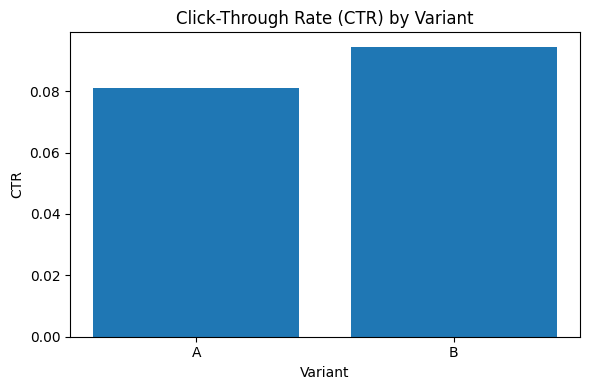

In [19]:
plt.figure(figsize=(6,4))
plt.bar(summary_variant["variant"], summary_variant["clicked_rate"])
plt.title("Click-Through Rate (CTR) by Variant")
plt.xlabel("Variant")
plt.ylabel("CTR")
plt.tight_layout()
plt.show()

In [ ]:
# Ensure hour column exists
if 'hour' not in df.columns:
    df['hour'] = df['timestamp'].dt.hour

# Compute hourly CTR
hourly = df.groupby('hour')['clicked_cta'].mean().reset_index()
print(hourly.head())

plt.figure(figsize=(8,4))
plt.plot(hourly['hour'], hourly['clicked_cta'], marker='o')
plt.title('CTR by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('CTR')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

KeyError: 'hour'